In [1]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import pandas as pd
import numpy as np
from time import time
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# WINDOW_SIZE = 257, CODEBOOK_SIZE = 10000

enable_norm = True

X_train = np.loadtxt("./feature_train.csv", delimiter = ",").reshape(-1,384)
y_train = np.loadtxt("./label_train.csv", delimiter = ",")
X_test = np.loadtxt("./feature_test.csv", delimiter=",").reshape(-1,384)
y_test = np.loadtxt("./label_test.csv", delimiter=",")


In [2]:
if enable_norm:
    X_train = np.transpose(X_train)
    X_test = np.transpose(X_test)

    model_normalizer_horizontal = MinMaxScaler()
    model_normalizer_horizontal.fit(X_train)
    X_train = model_normalizer_horizontal.transform(X_train)

    model_normalizer_horizontal = MinMaxScaler()
    model_normalizer_horizontal.fit(X_test)
    X_test = model_normalizer_horizontal.transform(X_test)

    X_train = np.transpose(X_train)
    X_test = np.transpose(X_test)

    model_normalizer_vertical = MinMaxScaler()
    model_normalizer_vertical.fit(X_train)

    X_train = model_normalizer_vertical.transform(X_train)
    X_test = model_normalizer_vertical.transform(X_test)

In [3]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Using TensorFlow backend.


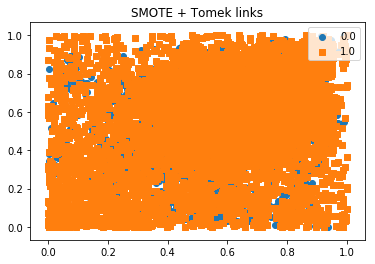

In [4]:
import imblearn

from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_sample(X_train, y_train)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')


In [5]:
X_train, y_train = X_smt, y_smt
X_test, y_test = smt.fit_sample(X_test, y_test)

In [6]:
label_names = ['Buggy', 'Correct']

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

-> Processing 10-Fold Cross Validation and Grid Search

Fitting 8 folds for each of 3 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:  4.0min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:  4.0min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:  5.8min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:  5.8min remaining:   49.9s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  5.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  5.8min finished


[LibSVM]-> Done! Show Grid scores

{'mean_fit_time': array([126.04094133,  92.54309192,  98.95295975]), 'std_fit_time': array([0.63985489, 0.9179909 , 0.89031584]), 'mean_score_time': array([ 9.90644079,  7.92625734, 11.52074602]), 'std_score_time': array([0.26908781, 0.10296223, 0.21670183]), 'param_C': masked_array(data=[1, 1, 1],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'poly', 'rbf'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_verbose': masked_array(data=[True, True, True],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'kernel': 'linear', 'verbose': True}, {'C': 1, 'kernel': 'poly', 'verbose': True}, {'C': 1, 'kernel': 'rbf', 'verbose': True}], 'split0_test_score': array([0.75087108, 0.84785134, 0.78281069]), 'split1_test_score': array([0.7746806 , 0.87049942, 0.82520325

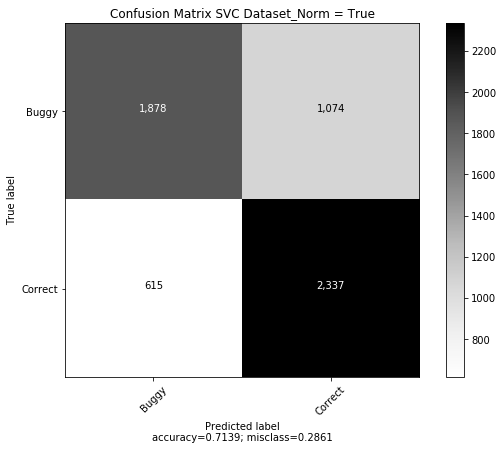

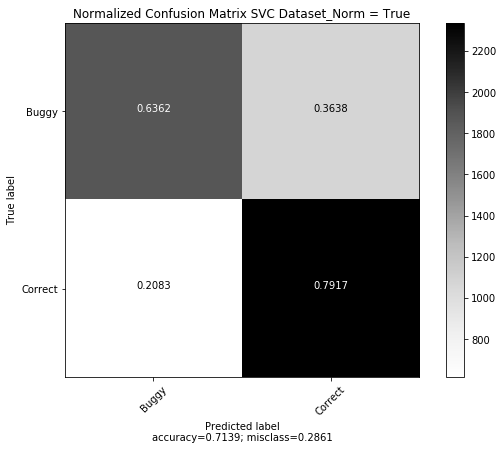




              precision    recall  f1-score   support

         0.0       0.75      0.64      0.69      2952
         1.0       0.69      0.79      0.73      2952

    accuracy                           0.71      5904
   macro avg       0.72      0.71      0.71      5904
weighted avg       0.72      0.71      0.71      5904


Accuracy 0.7139227642276422
Training time : 419.832

Test time : 24.4




In [24]:
# SVM
param_grid_ = {'C': [1], "kernel":["linear","poly", "rbf"], 'verbose': [True]}
print('-> Processing 10-Fold Cross Validation and Grid Search\n')

bow_search = GridSearchCV(SVC(), cv=8, param_grid=param_grid_, scoring='f1_micro', n_jobs=-1, verbose=10)
t0 = time()
bow_search.fit(X_train, y_train)
training_time = round(time()-t0, 3)
print('-> Done! Show Grid scores\n')

print(bow_search.cv_results_,'\n\n')

print("Best parameters set found on development set:\n")
print(bow_search.best_params_,'\n')
print("Grid scores on development set:\n")
means = bow_search.cv_results_['mean_test_score']
stds = bow_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, bow_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print('\n\n')
print("Detailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.\n\n")
t0 = time()
y_true, y_pred = y_test, bow_search.predict(X_test)
test_time = round(time()-t0, 3)
cmat = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm           = cmat, 
                      normalize    = False,
                      target_names = label_names,
                      cmap = plt.get_cmap('Greys'),
                      title        = "Confusion Matrix SVC Dataset_Norm = %s" % str(enable_norm))
plot_confusion_matrix(cm           = cmat, 
                      target_names = label_names,
                      cmap = plt.get_cmap('Greys'),
                      title        = "Normalized Confusion Matrix SVC Dataset_Norm = %s" % str(enable_norm))
print('\n\n')
print(classification_report(y_true, y_pred))
print()
print('Accuracy', metrics.accuracy_score(y_pred,y_test))
print("Training time : {}\n".format(training_time))
print("Test time : {}\n".format(test_time))
print()

-> Processing 10-Fold Cross Validation and Grid Search

Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:  1.6min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:  1.6min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:  1.7min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:  1.7min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:  1.7min remaining:   33.5s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.7min finished


[LibSVM]-> Done! Show Grid scores

{'mean_fit_time': array([93.92714122]), 'std_fit_time': array([1.20356502]), 'mean_score_time': array([4.47086579]), 'std_score_time': array([0.09705776]), 'param_C': masked_array(data=[10],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['poly'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_verbose': masked_array(data=[True],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'C': 10, 'kernel': 'poly', 'verbose': True}], 'split0_test_score': array([0.91289199]), 'split1_test_score': array([0.92276423]), 'split2_test_score': array([0.91690877]), 'split3_test_score': array([0.91748983]), 'split4_test_score': array([0.91226031]), 'split5_test_score': array([0.91690877]), 'split6_test_score': array([0.92097618]), 'split7_test_score': array([0.9110982]), 'mean_test_score': array([0.91641229]), 'std_test_score': array

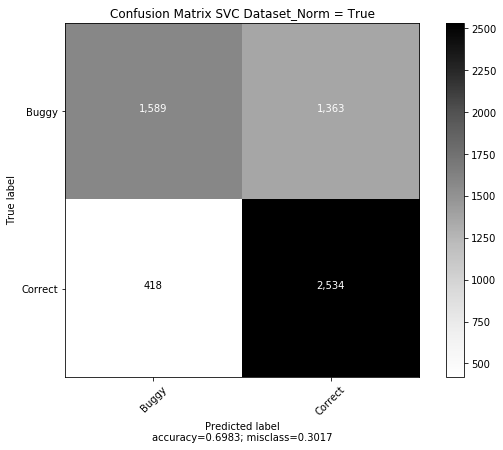

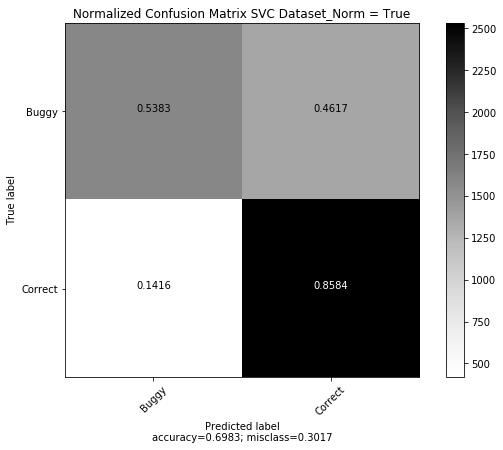




              precision    recall  f1-score   support

         0.0       0.79      0.54      0.64      2952
         1.0       0.65      0.86      0.74      2952

    accuracy                           0.70      5904
   macro avg       0.72      0.70      0.69      5904
weighted avg       0.72      0.70      0.69      5904


Accuracy 0.698340108401084
Training time : 159.095

Test time : 17.231




In [20]:
# SVM
param_grid_ = {'C': [10], "kernel":["poly"], 'verbose': [True]}
print('-> Processing 10-Fold Cross Validation and Grid Search\n')

bow_search = GridSearchCV(SVC(), cv=8, param_grid=param_grid_, scoring='f1_micro', n_jobs=-1, verbose=10)
t0 = time()
bow_search.fit(X_train, y_train)
training_time = round(time()-t0, 3)
print('-> Done! Show Grid scores\n')

print(bow_search.cv_results_,'\n\n')

print("Best parameters set found on development set:\n")
print(bow_search.best_params_,'\n')
print("Grid scores on development set:\n")
means = bow_search.cv_results_['mean_test_score']
stds = bow_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, bow_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print('\n\n')
print("Detailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.\n\n")
t0 = time()
y_true, y_pred = y_test, bow_search.predict(X_test)
test_time = round(time()-t0, 3)
cmat = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm           = cmat, 
                      normalize    = False,
                      target_names = label_names,
                      cmap = plt.get_cmap('Greys'),
                      title        = "Confusion Matrix SVC Dataset_Norm = %s" % str(enable_norm))
plot_confusion_matrix(cm           = cmat, 
                      target_names = label_names,
                      cmap = plt.get_cmap('Greys'),
                      title        = "Normalized Confusion Matrix SVC Dataset_Norm = %s" % str(enable_norm))
print('\n\n')
print(classification_report(y_true, y_pred))
print()
print('Accuracy', metrics.accuracy_score(y_pred,y_test))
print("Training time : {}\n".format(training_time))
print("Test time : {}\n".format(test_time))
print()

-> Processing 10-Fold Cross Validation and Grid Search

Fitting 8 folds for each of 2 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  16 | elapsed:  1.7min remaining:  7.2min
[Parallel(n_jobs=-1)]: Done   5 out of  16 | elapsed:  1.7min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done   7 out of  16 | elapsed:  1.8min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   9 out of  16 | elapsed:  2.3min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:  2.6min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:  2.6min remaining:   36.3s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  2.7min finished


[LibSVM]-> Done! Show Grid scores

{'mean_fit_time': array([97.48179373, 50.77591652]), 'std_fit_time': array([4.62270056, 2.75184729]), 'mean_score_time': array([3.3011671 , 3.69104069]), 'std_score_time': array([0.86709723, 0.22922427]), 'param_C': masked_array(data=[100, 100],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['poly', 'rbf'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_verbose': masked_array(data=[True, True],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 100, 'kernel': 'poly', 'verbose': True}, {'C': 100, 'kernel': 'rbf', 'verbose': True}], 'split0_test_score': array([0.94018583, 0.91347271]), 'split1_test_score': array([0.94889663, 0.94425087]), 'split2_test_score': array([0.95119117, 0.94479954]), 'split3_test_score': array([0.949448  , 0.93957002]), 'split4_test_score': array([0.94305636, 0.9366

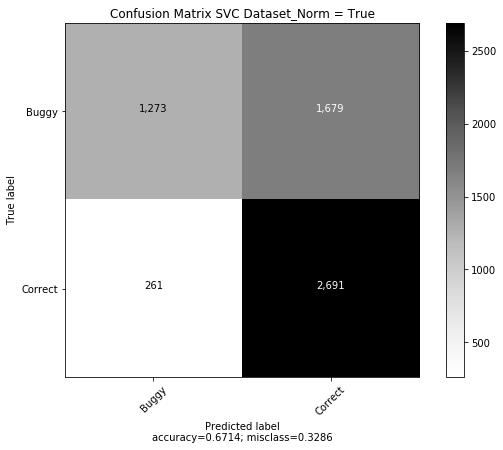

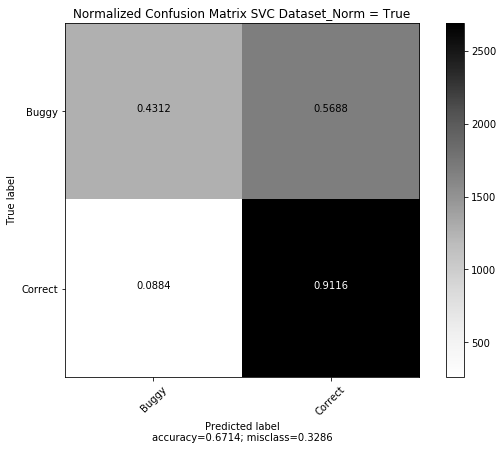




              precision    recall  f1-score   support

         0.0       0.83      0.43      0.57      2952
         1.0       0.62      0.91      0.74      2952

    accuracy                           0.67      5904
   macro avg       0.72      0.67      0.65      5904
weighted avg       0.72      0.67      0.65      5904


Accuracy 0.6714092140921409
Training time : 246.366

Test time : 7.708




In [22]:
# SVM
param_grid_ = {'C': [100], "kernel":["poly", "rbf"], 'verbose': [True]}
print('-> Processing 10-Fold Cross Validation and Grid Search\n')

bow_search = GridSearchCV(SVC(), cv=8, param_grid=param_grid_, scoring='f1_micro', n_jobs=-1, verbose=10)
t0 = time()
bow_search.fit(X_train, y_train)
training_time = round(time()-t0, 3)
print('-> Done! Show Grid scores\n')

print(bow_search.cv_results_,'\n\n')

print("Best parameters set found on development set:\n")
print(bow_search.best_params_,'\n')
print("Grid scores on development set:\n")
means = bow_search.cv_results_['mean_test_score']
stds = bow_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, bow_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print('\n\n')
print("Detailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.\n\n")
t0 = time()
y_true, y_pred = y_test, bow_search.predict(X_test)
test_time = round(time()-t0, 3)
cmat = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm           = cmat, 
                      normalize    = False,
                      target_names = label_names,
                      cmap = plt.get_cmap('Greys'),
                      title        = "Confusion Matrix SVC Dataset_Norm = %s" % str(enable_norm))
plot_confusion_matrix(cm           = cmat, 
                      target_names = label_names,
                      cmap = plt.get_cmap('Greys'),
                      title        = "Normalized Confusion Matrix SVC Dataset_Norm = %s" % str(enable_norm))
print('\n\n')
print(classification_report(y_true, y_pred))
print()
print('Accuracy', metrics.accuracy_score(y_pred,y_test))
print("Training time : {}\n".format(training_time))
print("Test time : {}\n".format(test_time))
print()

Iteration 1, loss = 0.73907537
Validation score: 0.649237
Iteration 2, loss = 0.68895288
Validation score: 0.657952
Iteration 3, loss = 0.67358268
Validation score: 0.671750
Iteration 4, loss = 0.65844545
Validation score: 0.671750
Iteration 5, loss = 0.65003110
Validation score: 0.674655
Iteration 6, loss = 0.63794922
Validation score: 0.664488
Iteration 7, loss = 0.65673452
Validation score: 0.682643
Iteration 8, loss = 0.62933200
Validation score: 0.692084
Iteration 9, loss = 0.62570204
Validation score: 0.692084
Iteration 10, loss = 0.62382410
Validation score: 0.651416
Iteration 11, loss = 0.62549490
Validation score: 0.687727
Iteration 12, loss = 0.61669046
Validation score: 0.688453
Iteration 13, loss = 0.61109199
Validation score: 0.698620
Iteration 14, loss = 0.60758995
Validation score: 0.702251
Iteration 15, loss = 0.59135323
Validation score: 0.699346
Iteration 16, loss = 0.58932624
Validation score: 0.698620
Iteration 17, loss = 0.60934682
Validation score: 0.677560
Iterat

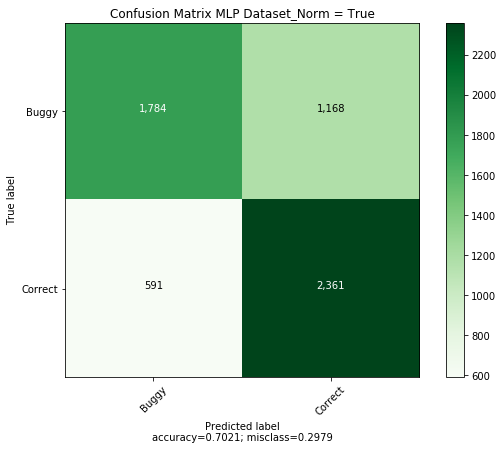

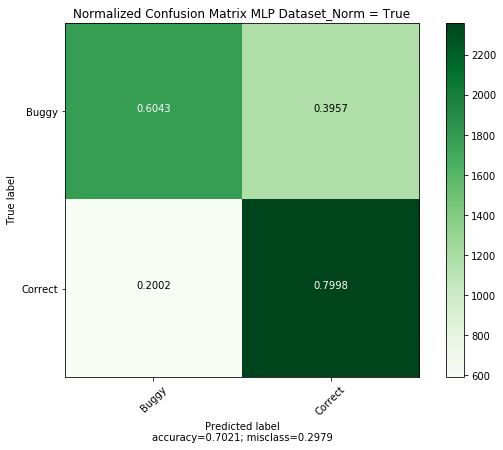

              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67      2952
         1.0       0.67      0.80      0.73      2952

    accuracy                           0.70      5904
   macro avg       0.71      0.70      0.70      5904
weighted avg       0.71      0.70      0.70      5904

Accuracy 0.7020663956639567


In [15]:
# MLPClassifier
clf = MLPClassifier(activation='tanh', alpha=0.03, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(384, 256, 128, 64, 32, 16, 8, 4, 2), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=100000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=48, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=True)


clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

cmat = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm           = cmat, 
                      normalize    = False,
                      target_names = label_names,
                      cmap = plt.get_cmap('Greens'),
                      title        = "Confusion Matrix MLP Dataset_Norm = %s" % str(enable_norm))
plot_confusion_matrix(cm           = cmat, 
                      target_names = label_names,
                      cmap = plt.get_cmap('Greens'),
                      title        = "Normalized Confusion Matrix MLP Dataset_Norm = %s" % str(enable_norm))
print(classification_report(y_true, y_pred))
print('Accuracy', metrics.accuracy_score(y_pred,y_test))